In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv('/content/greendestination (1) (1).csv.csv')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
data = pd.read_csv('/content/greendestination (1) (1).csv.csv')
print("original DataFrame Columns:")
print(data.columns)
if 'ï»¿Age' in data.columns:
    data.rename(columns={'ï»¿Age': 'Age'}, inplace=True)
    print("\nDataFrame Columns after renaming 'ï»¿Age':")
    print(data.columns)

original DataFrame Columns:
Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [ ]:
if 'Attrition' in data.columns:
    data['Attrition'] = data['Attrition'].astype(str).str.strip() # Ensure string type and strip whitespace
    data['Attrition_Numeric'] = data['Attrition'].apply(lambda x: 1 if x.lower() == 'yes' else 0)


Original DataFrame Columns:
Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

Overall Attrition Rate: 16.12%


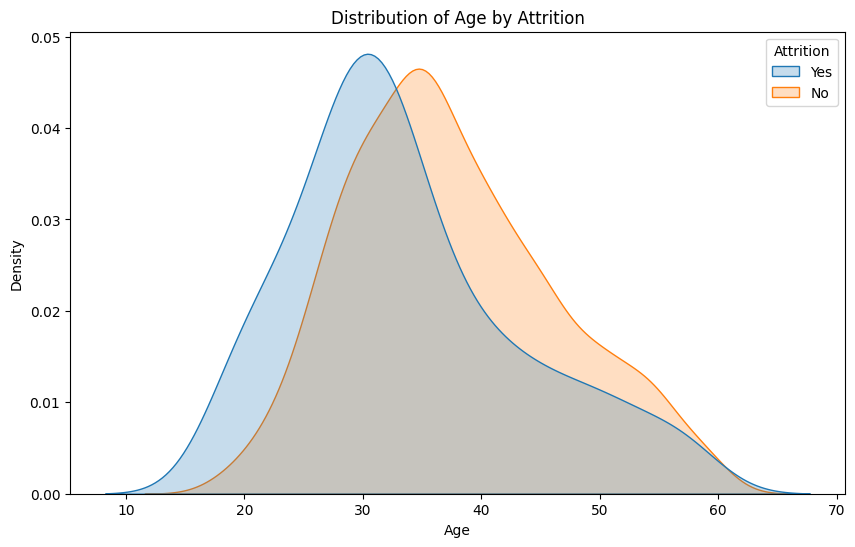


Descriptive Statistics for Age by Attrition:
            count       mean      std   min   25%   50%   75%   max
Attrition                                                          
No         1233.0  37.561233  8.88836  18.0  31.0  36.0  43.0  60.0
Yes         237.0  33.607595  9.68935  18.0  28.0  32.0  39.0  58.0


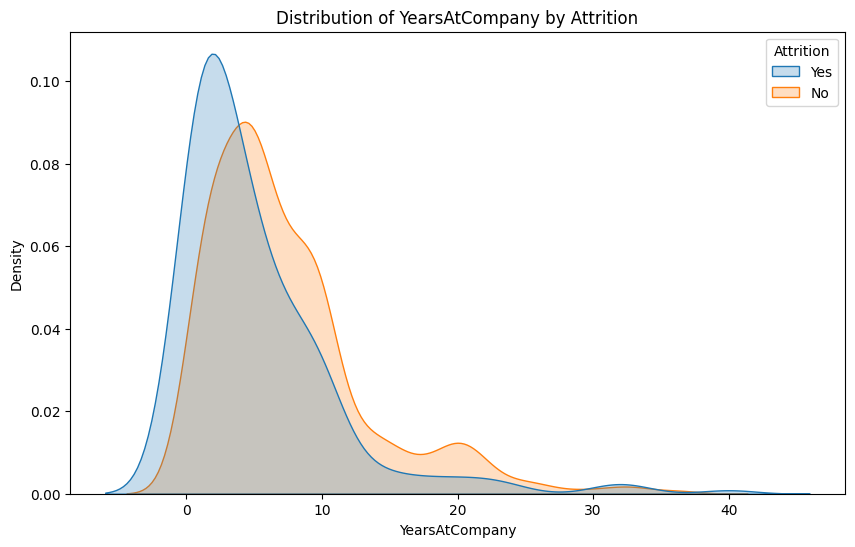


Descriptive Statistics for YearsAtCompany by Attrition:
            count      mean       std  min  25%  50%   75%   max
Attrition                                                       
No         1233.0  7.369019  6.096298  0.0  3.0  6.0  10.0  37.0
Yes         237.0  5.130802  5.949984  0.0  1.0  3.0   7.0  40.0


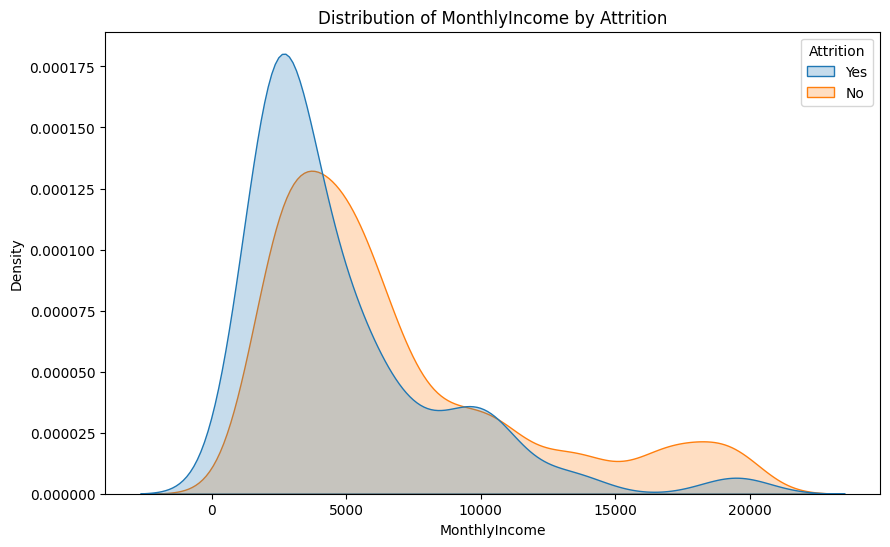


Descriptive Statistics for MonthlyIncome by Attrition:
            count         mean          std     min     25%     50%     75%  \
Attrition                                                                     
No         1233.0  6832.739659  4818.208001  1051.0  3211.0  5204.0  8834.0   
Yes         237.0  4787.092827  3640.210367  1009.0  2373.0  3202.0  5916.0   

               max  
Attrition           
No         19999.0  
Yes        19859.0  


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv('/content/greendestination (1) (1).csv.csv')
print("Original DataFrame Columns:")
print(df.columns)

# Rename the problematic 'ï»¿Age' column to 'Age' if it exists
if 'ï»¿Age' in df.columns:
    df.rename(columns={'ï»¿Age': 'Age'}, inplace=True)
    print("\nDataFrame Columns after renaming 'ï»¿Age':")
    print(df.columns)

# Convert 'Attrition' column to numerical (Yes=1, No=0)
if 'Attrition' in df.columns:
    df['Attrition'] = df['Attrition'].astype(str).str.strip() # Ensure string type and strip whitespace
    df['Attrition_Numeric'] = df['Attrition'].apply(lambda x: 1 if x.lower() == 'yes' else 0)

    # Calculate Attrition Rate
    attrition_rate = df['Attrition_Numeric'].mean() * 100
    print(f"\nOverall Attrition Rate: {attrition_rate:.2f}%")

    # Analyze factors: Age, YearsAtCompany, MonthlyIncome
    factors = ['Age', 'YearsAtCompany', 'MonthlyIncome']

    for factor in factors:
        if factor in df.columns:
            # Ensure the factor column is numeric
            df[factor] = pd.to_numeric(df[factor], errors='coerce')
            df_filtered = df.dropna(subset=[factor]) # Drop rows with NaN in the current factor

            if not df_filtered.empty:
                plt.figure(figsize=(10, 6))
                sns.kdeplot(data=df_filtered, x=factor, hue='Attrition', fill=True, common_norm=False)
                plt.title(f'Distribution of {factor} by Attrition')
                plt.xlabel(factor)
                plt.ylabel('Density')
                plt.show() # Use plt.show() in Colab to display plots
                # If you want to save them to your drive after displaying:
                # plt.savefig(f'/content/drive/MyDrive/{factor}_Attrition_Distribution_KDE.png')
                plt.close()

                # Descriptive statistics for each factor by Attrition
                print(f"\nDescriptive Statistics for {factor} by Attrition:")
                print(df_filtered.groupby('Attrition')[factor].describe())
            else:
                print(f"\nSkipping {factor}: No valid numerical data after dropping NaNs.")
        else:
            print(f"\nColumn '{factor}' not found in the DataFrame. Please ensure the column name is correct.")
else:
    print("\n'Attrition' column not found in the DataFrame. Please check the column name in your CSV file.")
